In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

In [83]:
df_food = pd.read_csv("FastFoodNutritionMenuV3_cleaned_predicted.csv", index_col=0)
df_food

Company                                               Item  \
0     McDonald’s                                          Hamburger   
1     McDonald’s                                       Cheeseburger   
2     McDonald’s                                Double Cheeseburger   
3     McDonald’s                                           McDouble   
4     McDonald’s                       Quarter Pounder® with Cheese   
...          ...                                                ...   
1030   Pizza Hut  Hand Tossed Slices Ultimate Cheese Lover’s® Me...   
1031   Pizza Hut  Hand Tossed Slices Ultimate Cheese Lover’s® Large   
1032   Pizza Hut           Hand Tossed Slices Veggie Lover’s® Small   
1033   Pizza Hut          Hand Tossed Slices Veggie Lover’s® Medium   
1034   Pizza Hut           Hand Tossed Slices Veggie Lover’s® Large   

       Food Type Predicted Food Type  Calories  Total Fat (g)  \
0           beef                beef       250            9.0   
1           beef                beef       300           12.0   
2           beef                beef       440           23.0   
3           beef                beef       390           19.0   
4           beef                beef       510           26.0   
...          ...                 ...       ...            ...   
1030  vegetarian             chicken       230           10.0   
1031  vegetarian             chicken       310           13.0   
1032  vegetarian               drink       120            4.0   
1033  vegetarian          vegetarian       200            6.0   
1034  vegetarian          vegetarian       260            9.0   

      Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
0                   3.5            0.5                25          520   
1                   6.0            0.5                40          750   
2                  11.0            1.5                80         1150   
3                   8.0            1.0                65          920   
4                  12.0            1.5                90         1190   
...                 ...            ...               ...          ...   
1030                4.5            0.0                25          390   
1031                6.0            0.0                35          540   
1032                1.5            0.0                10          230   
1033                2.5            0.0                15          370   
1034                4.0            0.0                20          510   

      Carbs (g)  Fiber (g)  Sugars (g)  Protein (g)  
0            31          2           6           12  
1            33          2           6           15  
2            34          2           7           25  
3            33          2           7           22  
4            40          3           9           29  
...         ...        ...         ...          ...  
1030         25          2           1           11  
1031         33          2           1           15  
1032         17          1           1            5  
1033         27          2           2            8  
1034         36          3           3           11  

[691 rows x 14 columns]

### Plot a Heatmap of the Correlation between Each Variable

<Axes: >

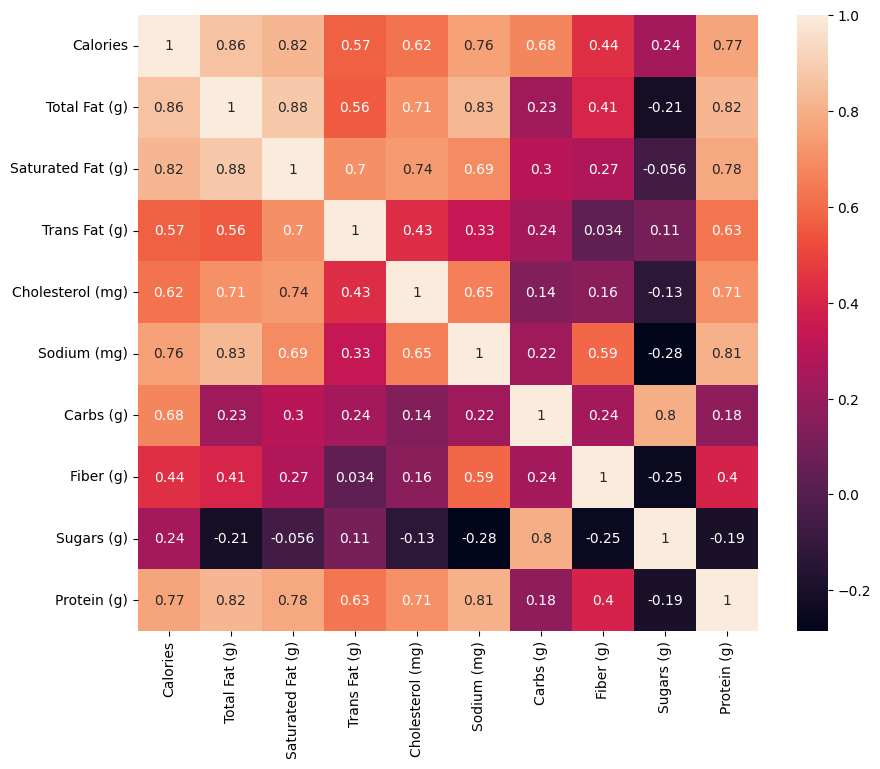

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(df_food.loc[:,"Calories":"Protein (g)"].corr(), annot=True)

### Predicting Calories based on Sugar Content above 20g

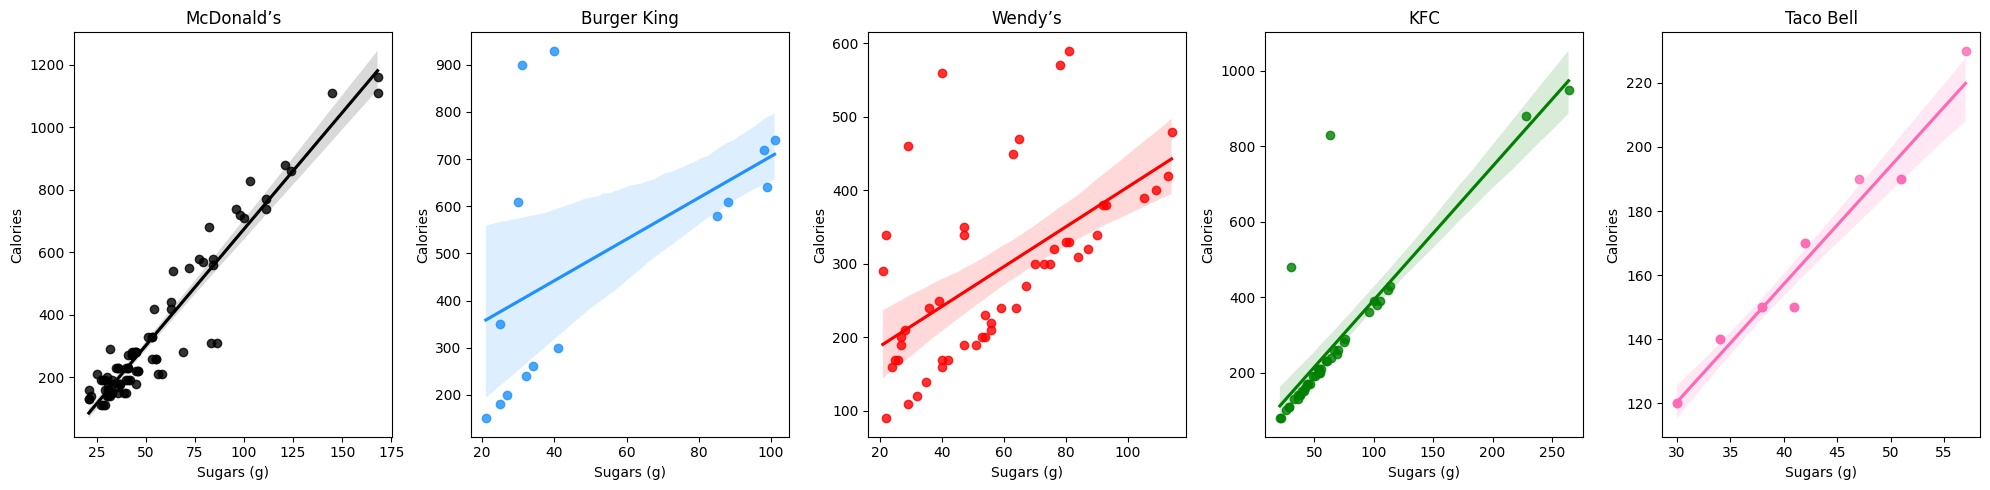

In [51]:
fig, ax = plt.subplots(1,5, figsize=(20,5))

filtered = df_food[df_food["Sugars (g)"]>20]
axes = ax.flatten()
colors = ["k", "dodgerblue", "r", "g", "hotpink"]
for idx, i in enumerate(filtered["Company"].unique()):
    company_df = filtered[filtered["Company"]==i]
    sns.regplot(data=company_df, x="Sugars (g)", y="Calories", ax=axes[idx], color=colors[idx])
    axes[idx].set_title(i)
fig.tight_layout()

### Visually Determine the best Predictor for Sodium

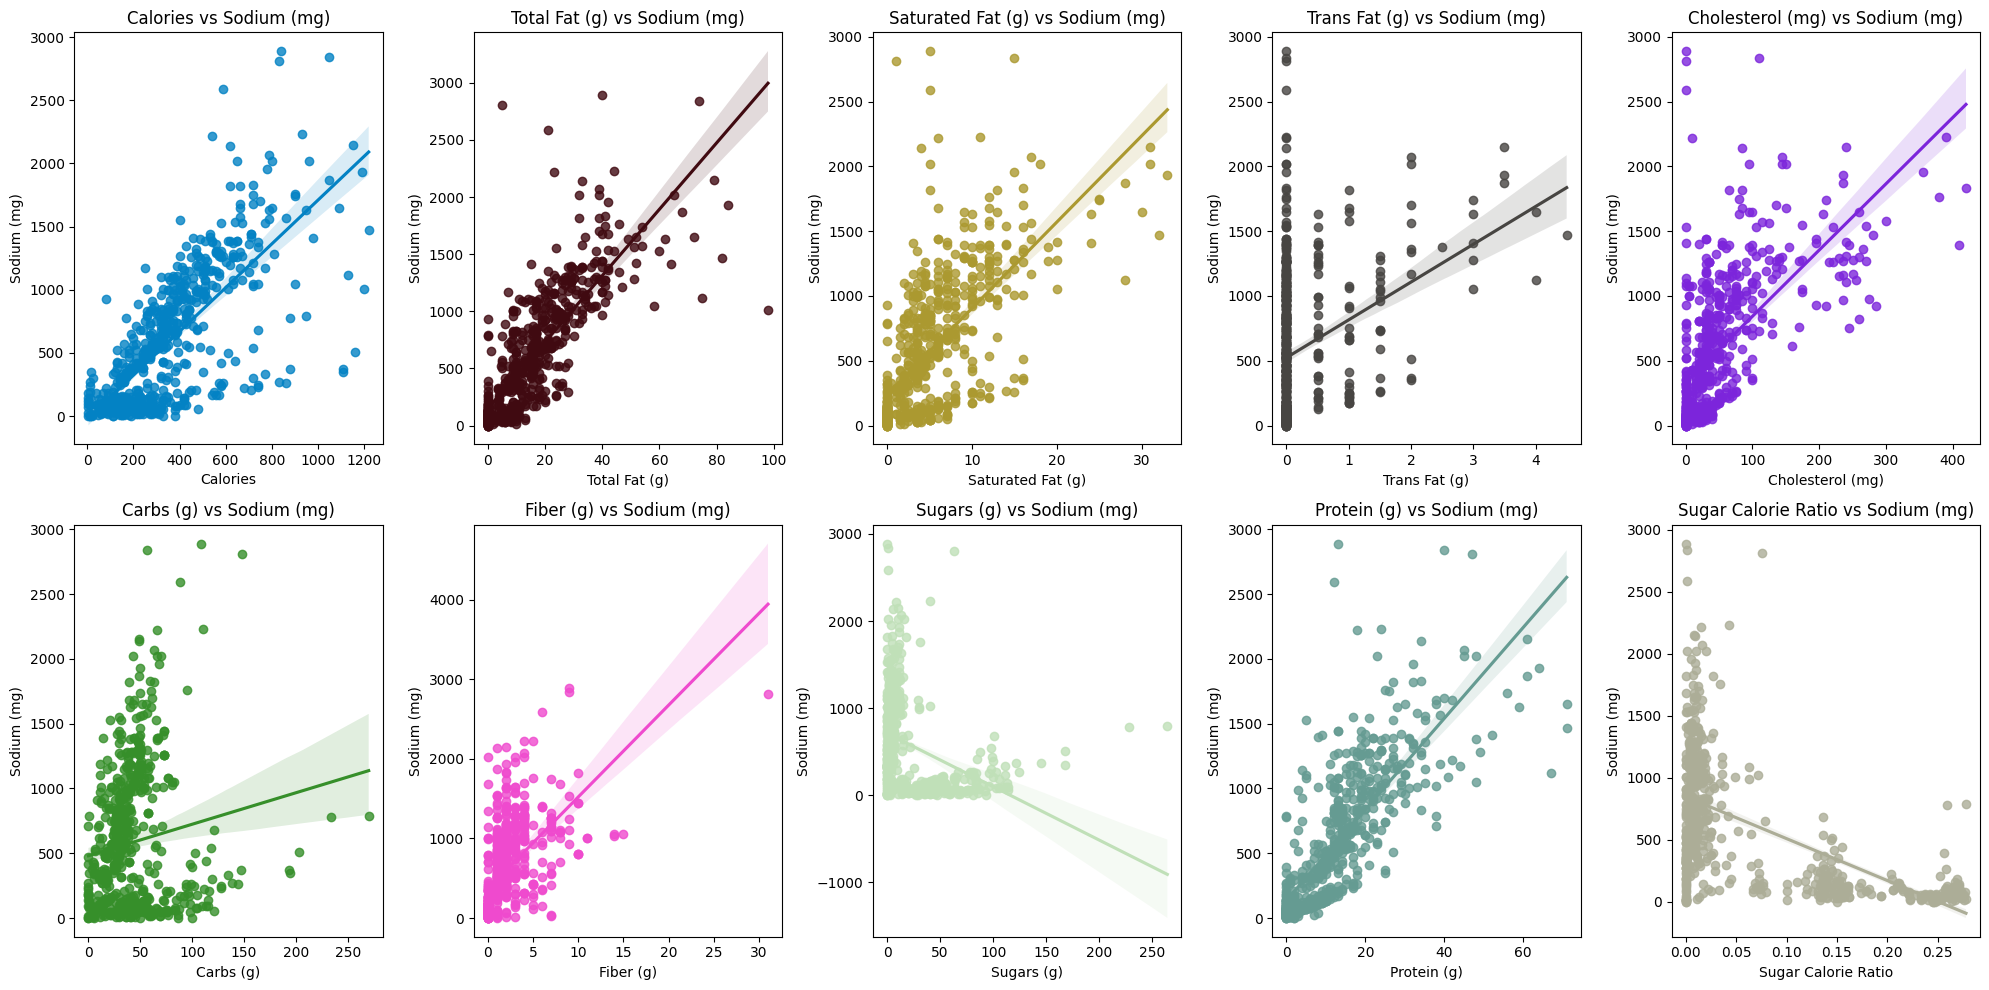

In [69]:
predictors = list(df_food.loc[:,"Calories":].columns)
predictors.remove("Sodium (mg)")

filtered = df_food[df_food["Calories"]>1]
fig, ax2 = plt.subplots(2,5, figsize=(20,10))
axes2 = ax2.flatten()
colors = np.random.rand(10, 3)

for idx, i in enumerate(predictors):
    sns.regplot(data=filtered, x=i, y="Sodium (mg)", ax=axes2[idx], color=colors[idx])
    axes2[idx].set_title(f"{i} vs Sodium (mg)")

fig.tight_layout()

### Understanding how Fat plays a role in Cholesterol

In [75]:
filtered = df_food[df_food["Sugars (g)"]>5]
sns.regplot(data=filtered, x="Total Fat (g)", y="Cholesterol (mg)")

<Axes: xlabel='Total Fat (g)', ylabel='Cholesterol (mg)'>

# Machine Learning Classification of Food Type

### Scaling the Data

In [84]:
scaler = StandardScaler()
data = df_food.loc[df_food["Food Type"] != np.nan, :]
scaler.fit(data.loc[:,"Calories":].values)
new_data = scaler.transform(data.loc[:,"Calories":].values)
new_data

array([[-0.29624794, -0.31412983, -0.23027457, ...,  0.10650538,
        -0.43636494,  0.02654266],
       [-0.0870427 , -0.11453101,  0.233361  , ...,  0.10650538,
        -0.43636494,  0.27328228],
       [ 0.49873197,  0.61733131,  1.16063214, ...,  0.10650538,
        -0.40351157,  1.09574769],
       ...,
       [-0.84018156, -0.64679452, -0.60118302, ..., -0.27880991,
        -0.60063176, -0.54918313],
       [-0.50545318, -0.51372865, -0.4157288 , ...,  0.10650538,
        -0.56777839, -0.3024435 ],
       [-0.25440689, -0.31412983, -0.13754746, ...,  0.49182068,
        -0.53492503, -0.05570388]])

### Train the Classification Model and Estimate Accuracy from Test set

In [118]:
X = new_data
y = data.loc[:,"Food Type"].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier
clf = SVC(kernel='rbf')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7553956834532374


### Confusion Matrix to determine Classification Performance

In [119]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Boundary Plot to Visualize the Classification

In [135]:
# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)



# Train SVM classifier on the reduced 2D data
clf = SVC(kernel='rbf')
clf.fit(X_train_2d, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_2d)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01) )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    mapper = {'beef': 0, 'chicken': 1, 'drink': 2, 'pork': 3, 'vegetarian': 4, "seafood": 5}
    replace_func = np.vectorize(lambda x: mapper.get(x, x))
    Z = replace_func(Z)
    Z = Z.reshape(xx.shape)

    colors_map = replace_func(y)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(plt.cm.tab10.colors[:len(np.unique(y))]))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=colors_map, cmap=ListedColormap(plt.cm.tab10.colors[:len(np.unique(y))]), edgecolor='k')
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(y)), title="Classes")
    plt.show()

# Visualize training data decision boundary
plot_decision_boundary(X_train_2d, y_train, clf, title="Decision Boundary (Training Data)")

Accuracy: 0.5539568345323741
